load MNIST dataset
epoch: 1
train mean loss=0.1770557660260242,train acc=0.9473522339275936
test mean loss=0.0901696271630724,test acc=0.9731774507231364
epoch: 2
train mean loss=0.0627500580117523,train acc=0.9800023184745755
test mean loss=0.06340310834232907,test acc=0.9814305480113548
epoch: 3
train mean loss=0.04398624473004451,train acc=0.9868092241504718
test mean loss=0.0492592546304219,test acc=0.9841815749749521
epoch: 4
train mean loss=0.0364051500622723,train acc=0.9885782507187229
test mean loss=0.05039292130557797,test acc=0.9838377024973275
epoch: 5
train mean loss=0.02866869630265984,train acc=0.991116416970982
test mean loss=0.04183954163310355,test acc=0.9848693363276275
epoch: 6
train mean loss=0.025085911073973052,train acc=0.992077844498575
test mean loss=0.050435610654209186,test acc=0.9852132129046087
epoch: 7
train mean loss=0.022705229894835328,train acc=0.9916548158729763
test mean loss=0.038950869437253316,test acc=0.9879642419178843
epoch: 8
train mean loss=

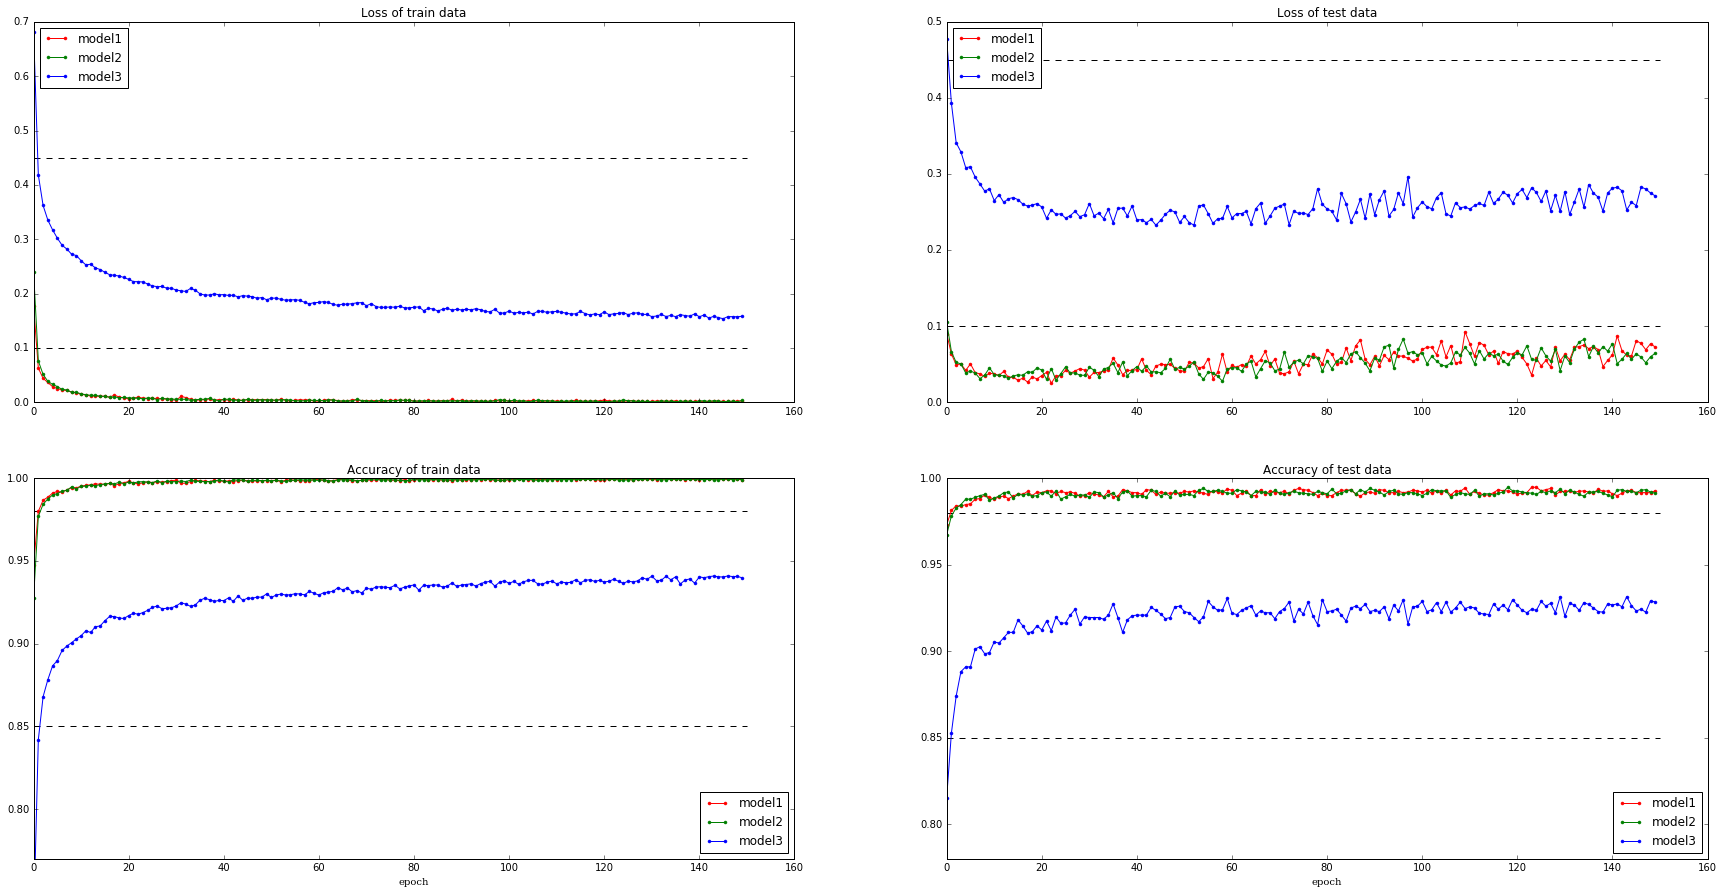

In [1]:
%matplotlib inline
#coding: utf-8
'''
グラフ描画のために、同様の処理をモデルごとに繰り返す。
あまりにも冗長かつ汚いので時間があれば修正
plotは一番下
'''
import numpy as np
with np.errstate(divide='ignore'):
    np.float64(1.0) / 0.0
import chainer
#from chainer import cuda
import chainer.functions as F
from chainer import optimizers
from chainer import initializer
from chainer.initializers import normal
import time
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
import pylab
import matplotlib.pyplot as plt
import scipy
from scipy.sparse import lil_matrix
import chainer.links as L

batchsize = 100
n_epoch = 150
start_time = time.clock()
# MNISTデータをロード
print("load MNIST dataset")
mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target
X = X.astype(np.float32)
y = y.astype(np.int32)

# ピクセルの値を0.0-1.0に正規化
X /= X.max()

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

N = y_train.size
N_test = y_test.size

# 画像を (nsample, channel, height, width) の4次元テンソルに変換
X_train = X_train.reshape((len(X_train), 1, 28, 28))
X_test = X_test.reshape((len(X_test), 1, 28, 28))
# plt.imshow(X_train[1][0], cmap=pylab.cm.gray_r, interpolation='nearest')
# plt.show()

y_train0123=[]
x_train0123=[]
x_test0123=[]
y_test0123=[]
list1=[0,1,2,3]

for idx in range(63000):
    if y_train[idx] in list1:
        y_train0123.append(y_train[idx])
        x_train0123.append(X_train[idx])

for idx in range(7000):
    if y_test[idx] in list1:
        y_test0123.append(y_test[idx])
        x_test0123.append(X_test[idx])

y_train0123=np.array(y_train0123)
x_train0123=np.array(x_train0123)
x_test0123=np.array(x_test0123)
y_test0123=np.array(y_test0123)

class semiLinearLayer11(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer11, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:50,0:50]=np.identity(50)
        
        self.W.data[...] = sparseW
        #print(self.W.data[...])
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer12(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer12, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        
        sparseW[0:50,50:100]=np.identity(50)
    
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer13(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer13, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        
        sparseW[0:50,100:150]=np.identity(50)
       
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer14(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer14, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:50,150:200]=np.identity(50)
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)    

    def __call__(self, x):
        return F.linear(x, self.W, b=None)


model1 = chainer.FunctionSet(l1=L.Linear(196,500),
                            l2=L.Linear(500,200),
                            l31=L.Linear(50,1),
                            l32=L.Linear(50,1),
                            l33=L.Linear(50,1),
                            l34=L.Linear(50,1)
                            )


'''
if gpu_flag >= 0:
    cuda.get_device(gpu_flag).use()
    model.to_gpu()
'''
def forward1(x_data, y_data, train=True):
    x, t = chainer.Variable(x_data), chainer.Variable(y_data)
    h0 = F.average_pooling_2d(x,2)
    h1 = F.dropout(F.relu(model1.l1(h0)))
    h2 = F.dropout(F.relu(model1.l2(h1)))

    L31 =semiLinearLayer11(200,50)
    h31=L31(h2)
    L32 =semiLinearLayer12(200,50)
    h32=L32(h2)
    L33 =semiLinearLayer13(200,50)
    h33=L33(h2)
    L34 =semiLinearLayer14(200,50)
    h34=L34(h2)

    y1= model1.l31(h31)
    y2= model1.l32(h32)
    y3= model1.l33(h33)
    y4= model1.l34(h34)

    Y1=chainer.functions.hstack([y1,y2])
    Y2=chainer.functions.hstack([y3,y4])
    y=chainer.functions.hstack([Y1,Y2])
    #print(L31.W.data)
    #print(y.data.shape)
    return F.softmax_cross_entropy(y, t),F.accuracy(y, t)

optimizer1 = optimizers.Adam()
optimizer1.setup(model1)

train_loss = []
train_acc  = []
test_loss = []
test_acc = []
l_epoch=[]
train_mean_loss_1=[]
train_acc_1=[]
test_mean_loss_1=[]
test_acc_1=[]


start_time = time.clock()
N=y_train0123.size
N_test=y_test0123.size
for epoch in range(1, n_epoch + 1):
    print("epoch: %d" % epoch)

    perm = np.random.permutation(N)
    train_sum_loss = 0
    train_sum_acc=0
    for i in range(0, N, batchsize):
        x_batch = np.asarray(x_train0123[perm[i:(i + batchsize) if (i+batchsize) < N else N ]])
        y_batch = np.asarray(y_train0123[perm[i:(i + batchsize) if (i+batchsize) < N else N ]])

        optimizer1.zero_grads()
        loss,acc = forward1(x_batch, y_batch)
        loss.backward()
        optimizer1.update()
        train_loss.append(loss.data)
        train_acc.append(acc.data)
        train_sum_loss += float(loss.data) * len(y_batch)
        train_sum_acc += float(acc.data) * len(y_batch)
    l_epoch.append("epoch: %d" % epoch)
    train_mean_loss_1.append(train_sum_loss/N)
    train_acc_1.append(train_sum_acc/N)
    
    print("train mean loss={},train acc={}".format(train_sum_loss / N, train_sum_acc/N))

    '''
    fp2.write("%d\t%f\n" % (epoch, sum_loss / N))
    fp2.flush()
    '''
    test_sum_accuracy = 0
    test_sum_loss=0
    #l3_W=[]
    for i in range(0, N_test, batchsize):
        x_batch = np.asarray(x_test0123[i:(i + batchsize) if (i+batchsize) < N else N ])
        y_batch = np.asarray(y_test0123[i:(i + batchsize) if (i+batchsize) < N else N ])
    
        
        loss,acc = forward1(x_batch, y_batch, train=False)
        test_acc.append(acc.data)
        test_loss.append(loss.data)
        test_sum_accuracy += float(acc.data) * len(y_batch)
        test_sum_loss += float(loss.data) * len(y_batch)
        
    print("test mean loss={},test acc={}".format(test_sum_loss/N_test,test_sum_accuracy / N_test))
    test_mean_loss_1.append(test_sum_loss/N_test)
    test_acc_1.append(test_sum_accuracy / N_test)
    #l3_W.append(model.l3.W)
    #print(model.l3.W[0,0:10])



#ここから二回目







# パラメータを安全に完全に分けるため、（冗長だけど）もう一回定義する
class semiLinearLayer21(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer21, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:125,0:125]=np.identity(125)


        self.W.data[...] = sparseW
        #print(self.W.data[...])
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer22(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer22, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        #sparseW[0:250,0:250]=np.ones(250*250).reshape(250,250)
        sparseW[0:125,125:250]=np.identity(125)
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer23(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer23, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:125,250:375]=np.identity(125)
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer24(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer24, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:125,375:500]=np.identity(125)
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)




model2 = chainer.FunctionSet(l1=L.Linear(196,500),

                            l21=L.Linear(125,50),
                            l22=L.Linear(125,50),
                            l23=L.Linear(125,50),
                            l24=L.Linear(125,50),
                            
                            l31=L.Linear(50,1),
                            l32=L.Linear(50,1),
                            l33=L.Linear(50,1),
                            l34=L.Linear(50,1)
                            )


'''
if gpu_flag >= 0:
    cuda.get_device(gpu_flag).use()
    model.to_gpu()
'''
def forward2(x_data, y_data, train=True):
    x, t = chainer.Variable(x_data), chainer.Variable(y_data)

    h0 = F.average_pooling_2d(x,2)
    h1 = F.dropout(F.relu(model2.l1(h0)))
    L21=semiLinearLayer21(500,125)
    L22=semiLinearLayer22(500,125)
    L23=semiLinearLayer23(500,125)
    L24=semiLinearLayer24(500,125)
    h11=L21(h1)
    h12=L22(h1)
    h13=L23(h1)
    h14=L24(h1)

    h21=F.dropout(F.relu(model2.l21(h11)))
    h22=F.dropout(F.relu(model2.l22(h12)))
    h23=F.dropout(F.relu(model2.l23(h13)))
    h24=F.dropout(F.relu(model2.l24(h14)))

    y1=model2.l31(h21)
    y2=model2.l32(h22)
    y3=model2.l33(h23)
    y4=model2.l34(h24)

    Y1=chainer.functions.hstack([y1,y2])
    Y2=chainer.functions.hstack([y3,y4])
    y=chainer.functions.hstack([Y1,Y2])
    
    return F.softmax_cross_entropy(y, t),F.accuracy(y, t)

optimizer2 = optimizers.Adam()
optimizer2.setup(model2)

train_loss = []
train_acc  = []
test_loss = []
test_acc = []
l_epoch=[]
train_mean_loss_2=[]
train_acc_2=[]
test_mean_loss_2=[]
test_acc_2=[]


start_time = time.clock()
N=y_train0123.size
N_test=y_test0123.size
for epoch in range(1, n_epoch + 1):
    print("epoch: %d" % epoch)

    perm = np.random.permutation(N)
    train_sum_loss = 0
    train_sum_acc=0
    for i in range(0, N, batchsize):
        x_batch = np.asarray(x_train0123[perm[i:(i + batchsize) if (i+batchsize) < N else N ]])
        y_batch = np.asarray(y_train0123[perm[i:(i + batchsize) if (i+batchsize) < N else N ]])

        optimizer2.zero_grads()
        loss,acc = forward2(x_batch, y_batch)
        loss.backward()
        optimizer2.update()
        train_loss.append(loss.data)
        train_acc.append(acc.data)
        train_sum_loss += float(loss.data) * len(y_batch)
        train_sum_acc += float(acc.data) * len(y_batch)
    l_epoch.append("epoch: %d" % epoch)
    train_mean_loss_2.append(train_sum_loss/N)
    train_acc_2.append(train_sum_acc/N)
    
    print("train mean loss={},train acc={}".format(train_sum_loss / N, train_sum_acc/N))

    '''
    fp2.write("%d\t%f\n" % (epoch, sum_loss / N))
    fp2.flush()
    '''
    test_sum_accuracy = 0
    test_sum_loss=0
    #l3_W=[]
    for i in range(0, N_test, batchsize):
        x_batch = np.asarray(x_test0123[i:(i + batchsize) if (i+batchsize) < N else N ])
        y_batch = np.asarray(y_test0123[i:(i + batchsize) if (i+batchsize) < N else N ])
    
        
        loss,acc = forward2(x_batch, y_batch, train=False)
        test_acc.append(acc.data)
        test_loss.append(loss.data)
        test_sum_accuracy += float(acc.data) * len(y_batch)
        test_sum_loss += float(loss.data) * len(y_batch)
        
    print("test mean loss={},test acc={}".format(test_sum_loss/N_test,test_sum_accuracy / N_test))
    test_mean_loss_2.append(test_sum_loss/N_test)
    test_acc_2.append(test_sum_accuracy / N_test)
    #l3_W.append(model.l3.W)
    #print(model.l3.W[0,0:10])


#ここから三回目
class semiLinearLayer31(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer31, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        

        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:49,0:49]=np.identity(49)
        self.W.data[...] = sparseW
        #print(self.W.data[...])
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer32(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer32, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:49,49:98]=np.identity(49)
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer33(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer33, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:49,98:147]=np.identity(49)
    
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)

class semiLinearLayer34(chainer.Link):

    def __init__(self, n_in, n_out):
        # Parameters are initialized as a numpy array of given shape.
        super(semiLinearLayer34, self).__init__(
            W=(n_out, n_in),
            b=(n_out,),
        )
        
        sparseW=np.zeros((n_out)*(n_in)).reshape(n_out,n_in)
        sparseW[0:49,147:196]=np.identity(49)
        self.W.data[...] = sparseW
        
        self.b.data.fill(0)
        

    def __call__(self, x):
        return F.linear(x, self.W, b=None)   


model3 = chainer.FunctionSet(l11=L.Linear(49,125),
                            l12=L.Linear(49,125),
                            l13=L.Linear(49,125),
                            l14=L.Linear(49,125),

                            l21=L.Linear(125,50),
                            l22=L.Linear(125,50),
                            l23=L.Linear(125,50),
                            l24=L.Linear(125,50),
                            
                            l31=L.Linear(50,1),
                            l32=L.Linear(50,1),
                            l33=L.Linear(50,1),
                            l34=L.Linear(50,1)
                            )


def forward3(x_data, y_data, train=True):
    x, t = chainer.Variable(x_data), chainer.Variable(y_data)

    h0 = F.average_pooling_2d(x,2)
    L1=semiLinearLayer31(196,49)
    L2=semiLinearLayer32(196,49)
    L3=semiLinearLayer33(196,49)
    L4=semiLinearLayer34(196,49)
    h01=L1(h0)
    h02=L2(h0)
    h03=L3(h0)
    h04=L4(h0)
    

    h11=F.dropout(F.relu(model3.l11(h01)))
    h12=F.dropout(F.relu(model3.l12(h02)))
    h13=F.dropout(F.relu(model3.l13(h03)))
    h14=F.dropout(F.relu(model3.l14(h04)))

    h21=F.dropout(F.relu(model3.l21(h11)))
    h22=F.dropout(F.relu(model3.l22(h12)))
    h23=F.dropout(F.relu(model3.l23(h13)))
    h24=F.dropout(F.relu(model3.l24(h14)))

    y1=model3.l31(h21)
    y2=model3.l32(h22)
    y3=model3.l33(h23)
    y4=model3.l34(h24)

    Y1=chainer.functions.hstack([y1,y2])
    Y2=chainer.functions.hstack([y3,y4])
    y=chainer.functions.hstack([Y1,Y2])
    #print(L31.W.data)
    return F.softmax_cross_entropy(y, t),F.accuracy(y, t)


optimizer3 = optimizers.Adam()
optimizer3.setup(model3)


train_loss = []
train_acc  = []
test_loss = []
test_acc = []
l_epoch=[]
train_mean_loss_3=[]
train_acc_3=[]
test_mean_loss_3=[]
test_acc_3=[]



for epoch in range(1, n_epoch + 1):
    print("epoch: %d" % epoch)

    perm = np.random.permutation(N)
    train_sum_loss = 0
    train_sum_acc=0
    for i in range(0, N, batchsize):
        x_batch = np.asarray(x_train0123[perm[i:(i + batchsize) if (i+batchsize) < N else N ]])
        y_batch = np.asarray(y_train0123[perm[i:(i + batchsize) if (i+batchsize) < N else N ]])

        optimizer3.zero_grads()
        loss,acc = forward3(x_batch, y_batch)
        loss.backward()
        optimizer3.update()
        train_loss.append(loss.data)
        train_acc.append(acc.data)
        train_sum_loss += float(loss.data) * len(y_batch)
        train_sum_acc += float(acc.data) * len(y_batch)
    l_epoch.append("epoch: %d" % epoch)
    train_mean_loss_3.append(train_sum_loss/N)
    train_acc_3.append(train_sum_acc/N)
    
    print("train mean loss={},train acc={}".format(train_sum_loss / N, train_sum_acc/N))

    '''
    fp2.write("%d\t%f\n" % (epoch, sum_loss / N))
    fp2.flush()
    '''
    test_sum_accuracy = 0
    test_sum_loss=0
    #l3_W=[]
    for i in range(0, N_test, batchsize):
        x_batch = np.asarray(x_test0123[i:(i + batchsize) if (i+batchsize) < N else N ])
        y_batch = np.asarray(y_test0123[i:(i + batchsize) if (i+batchsize) < N else N ])
    
        
        loss,acc = forward3(x_batch, y_batch, train=False)
        test_acc.append(acc.data)
        test_loss.append(loss.data)
        test_sum_accuracy += float(acc.data) * len(y_batch)
        test_sum_loss += float(loss.data) * len(y_batch)
        
    print("test mean loss={},test acc={}".format(test_sum_loss/N_test,test_sum_accuracy / N_test))
    test_mean_loss_3.append(test_sum_loss/N_test)
    test_acc_3.append(test_sum_accuracy / N_test)
    #l3_W.append(model.l3.W)
    #print(model.l3.W[0,0:10])


end_time = time.clock()
print(end_time - start_time)

#グラフ描画

plt.figure(figsize=(30,15))

plt.legend(["train_loss","test_loss","train_acc","tes_acc"],loc=4)



plt.subplot(2,2,1)
plt.plot(range(len(l_epoch)), train_mean_loss_1,'r.-',label='model1')
plt.hlines([0.1,0.45],0,len(l_epoch),linestyles="dashed")
#plt.yticks([0,0.1,0.2,0.3,0.4,0.45,0.5,0.6,0.7,1.0])
plt.plot(range(len(l_epoch)), train_mean_loss_2,'g.-',label='model2')
plt.plot(range(len(l_epoch)), train_mean_loss_3,'b.-',label='model3')
plt.title("Loss of train data")
plt.legend(loc=2)

plt.subplot(2,2,4)
plt.hlines([0.98,0.85],0,len(l_epoch),linestyles="dashed")
plt.plot(range(len(l_epoch)), test_acc_1,'r.-',label='model1')
plt.plot(range(len(l_epoch)), test_acc_2,'g.-',label='model2')
plt.plot(range(len(l_epoch)), test_acc_3,'b.-',label='model3')
plt.title('Accuracy of test data')
plt.xlabel("epoch",fontname='serif') 
plt.legend(loc=4)
plt.ylim(0.78,1.0)


plt.subplot(2,2,3)
plt.hlines([0.98,0.85],0,len(l_epoch),linestyles="dashed")
plt.plot(range(len(l_epoch)), train_acc_1,'r.-',label='model1')
plt.plot(range(len(l_epoch)), train_acc_2,'g.-',label='model2')
plt.plot(range(len(l_epoch)), train_acc_3,'b.-',label='model3')
plt.title('Accuracy of train data')
plt.xlabel("epoch",fontname='serif')
plt.legend(loc=4)
plt.ylim(0.77,1.0)

plt.subplot(2,2,2)
plt.hlines([0.1,0.45],0,len(l_epoch),linestyles="dashed")
plt.plot(range(len(l_epoch)), test_mean_loss_1,'r.-',label='model1')
plt.plot(range(len(l_epoch)), test_mean_loss_2,'g.-',label='model2')
plt.plot(range(len(l_epoch)), test_mean_loss_3,'b.-',label='model3')
plt.title("Loss of test data")
plt.legend(loc=2)

plt.plot()
plt.show()